In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, roc_curve, roc_auc_score
from mlxtend.evaluate import confusion_matrix
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('cryotherapy_dataset.csv')
df.head()

,sex,age,time,number_of_warts,type,area,result_of_treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [4]:
df.describe()

,sex,age,time,number_of_warts,type,area,result_of_treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [5]:
df['sex'].value_counts()

1    47
2    43
Name: sex, dtype: int64

## EDA

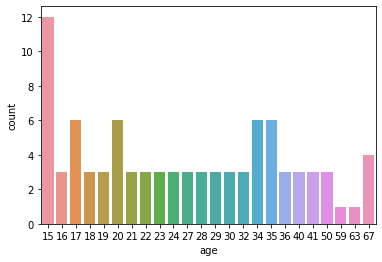

In [6]:
sns.countplot(df['age'])

from above plot maximum number of warts are present at the age of 15 itself.

#### Gender Description
1 - Male
2 - Female

In [7]:
df['sex'].value_counts()

1    47
2    43
Name: sex, dtype: int64

In [8]:
df['result_of_treatment'].value_counts()

1    48
0    42
Name: result_of_treatment, dtype: int64

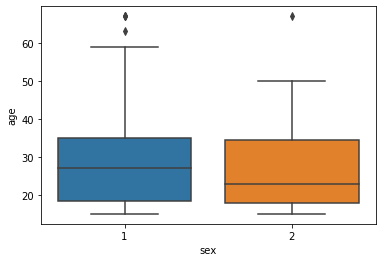

In [9]:
sns.boxplot(df['sex'], df['age'])

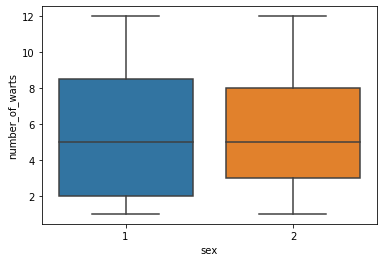

In [10]:
sns.boxplot(x=df['sex'], y=df['number_of_warts'])

When compared the Sex 1 and Sex 2 number of warts with Sex 1 is higher when compared to Sex 2.

Text(0.5, 1.0, 'Outcomes of operations for Male Patients')

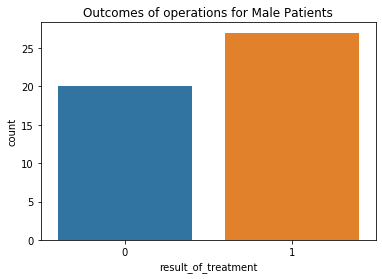

In [11]:
sns.countplot(df[df['sex']==1]['result_of_treatment'])
plt.title('Outcomes of operations for Male Patients')

Text(0.5, 1.0, 'Outcomes of operations for Female Patients')

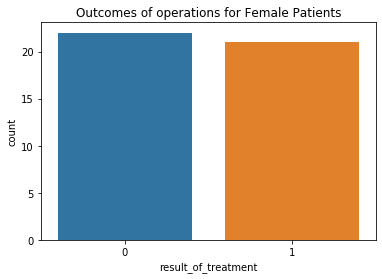

In [12]:
sns.countplot(df[df['sex']==2]['result_of_treatment'])
plt.title('Outcomes of operations for Female Patients')

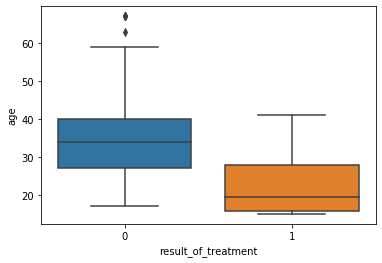

In [13]:
sns.boxplot(x=df['result_of_treatment'],y=df['age'])

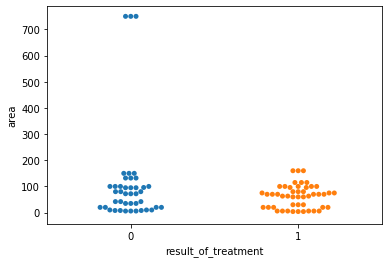

In [14]:
sns.swarmplot(x=df['result_of_treatment'],y=df['area'])

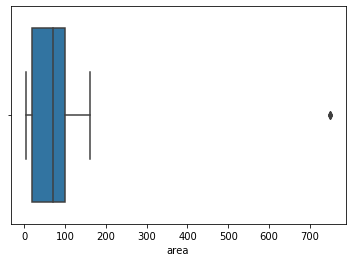

In [15]:
sns.boxplot(df['area'])

In [16]:
df=df[df['area']<200]

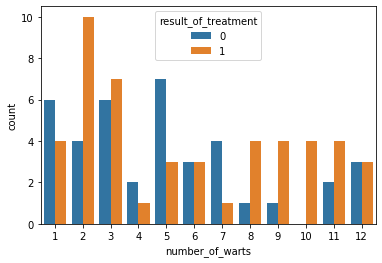

In [17]:
sns.countplot(x=df['number_of_warts'],hue=df['result_of_treatment'])

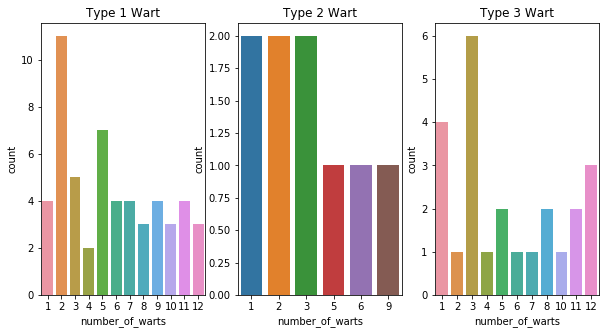

In [18]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
sns.countplot(df[df['type']==1]['number_of_warts'],ax=ax1)
sns.countplot(df[df['type']==2]['number_of_warts'],ax=ax2)
sns.countplot(df[df['type']==3]['number_of_warts'],ax=ax3)
ax1.title.set_text('Type 1 Wart')
ax2.title.set_text('Type 2 Wart')
ax3.title.set_text('Type 3 Wart')

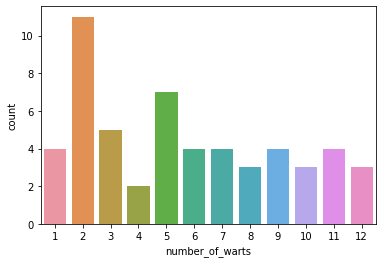

In [19]:
sns.countplot(df[df['type']==1]['number_of_warts'])

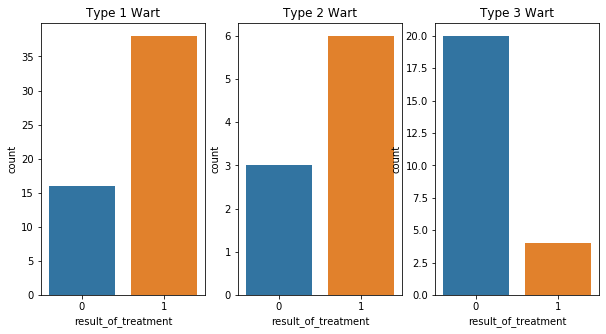

In [20]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
sns.countplot(df[df['type']==1]['result_of_treatment'],ax=ax1)
sns.countplot(df[df['type']==2]['result_of_treatment'],ax=ax2)
sns.countplot(df[df['type']==3]['result_of_treatment'],ax=ax3)
ax1.title.set_text('Type 1 Wart')
ax2.title.set_text('Type 2 Wart')
ax3.title.set_text('Type 3 Wart')

C:\Users\Prabhakaran\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Prabhakaran\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


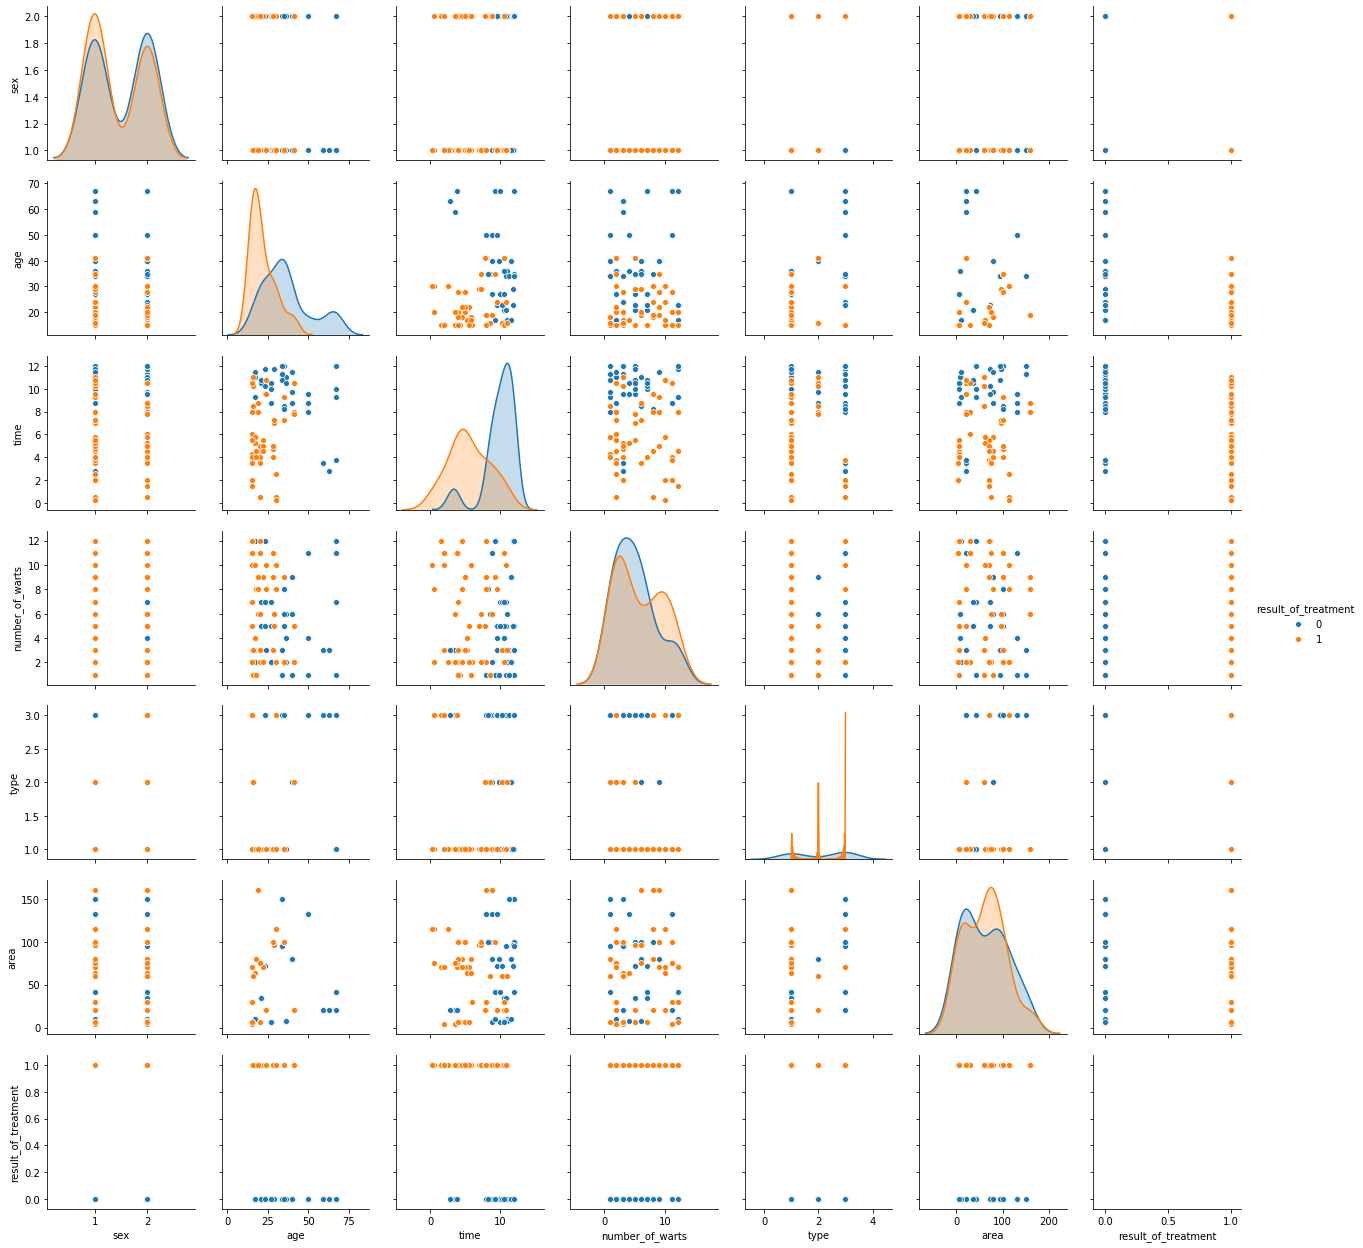

In [21]:
sns.pairplot(df,hue='result_of_treatment')

We can infer from the pairplot that area of the wart region lies within range of 0-250 in most of the cases like number of warts, area, time.

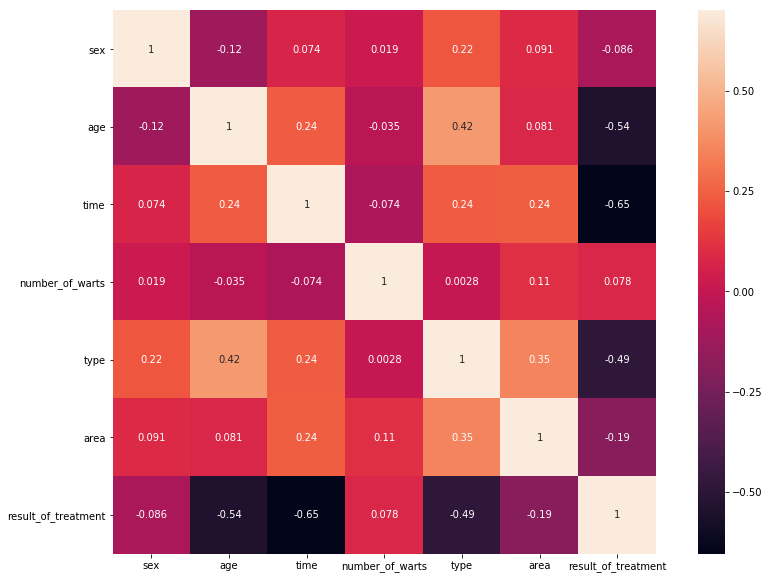

In [15]:
import seaborn as sns
plt.subplots(figsize=(15,10))
corrmat = df.corr()
sns.heatmap(corrmat, square=True, vmax=0.7, annot=True) 

In [16]:
df.cov()

,sex,age,time,number_of_warts,type,area,result_of_treatment
sex,0.252310,-0.773034,0.127341,0.033958,0.100000,6.035581,-0.021723
age,-0.773034,178.512360,10.755618,-1.658427,5.024719,142.415730,-3.638202
time,0.127341,10.755618,11.605337,-0.903558,0.724719,108.404494,-1.117978
number_of_warts,0.033958,-1.658427,-0.903558,12.724594,0.008989,51.108614,0.140075
type,0.100000,5.024719,0.724719,0.008989,0.819101,42.252809,-0.220225
area,6.035581,142.415730,108.404494,51.108614,42.252809,17353.623596,-12.483146
result_of_treatment,-0.021723,-3.638202,-1.117978,0.140075,-0.220225,-12.483146,0.251685


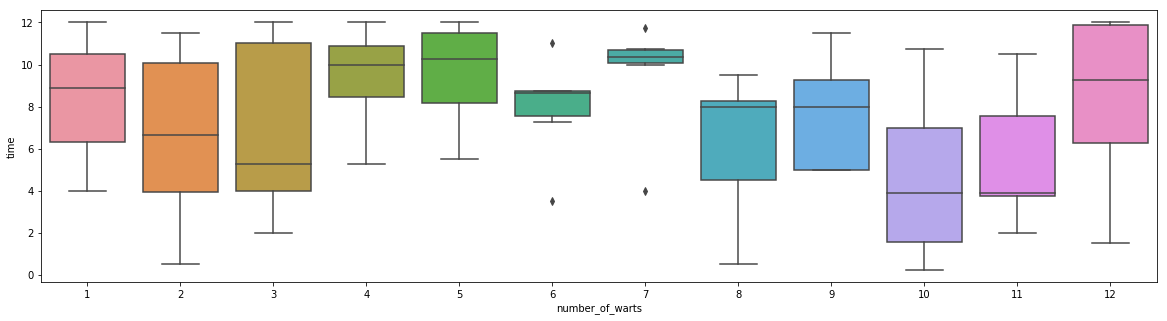

In [67]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df,y='time',x='number_of_warts',ax=ax)

In the above plot the number of warts 1,2,3 people are concerned about the treatment.
Patients with 3 warts take lesser time to get the treatment compared to patients with 1 wart. Clearly, patients get more anxious when number of warts increases, hence time decreases

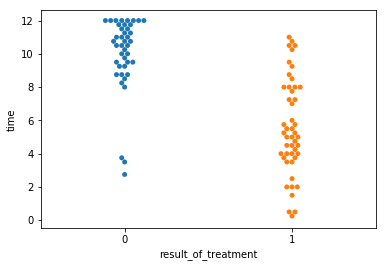

In [31]:
sns.swarmplot(df['result_of_treatment'],y=df['time'])

From the above plot we can infer that if treatment is delayed beyond 7 months there is high chance of treatment failure.

In [20]:
a = df[(df['time']>7) & (df['result_of_treatment']==1)]

In [21]:
b = df[(df['time']>7) & (df['result_of_treatment']==0)]

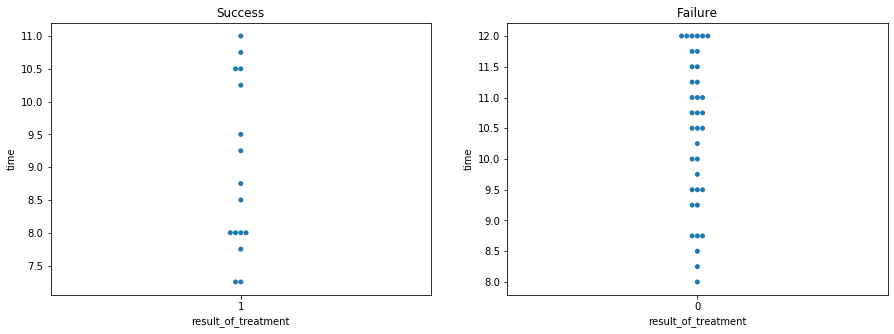

In [26]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.swarmplot(a['result_of_treatment'], a['time'],ax=ax1)
sns.swarmplot(b['result_of_treatment'], b['time'],ax=ax2)

ax1.title.set_text('Success')
ax2.title.set_text('Failure')


From the above two plots we can see the distribution of failure is spread evenly than success rate distribution for
time taken more than 7 months to treatment.

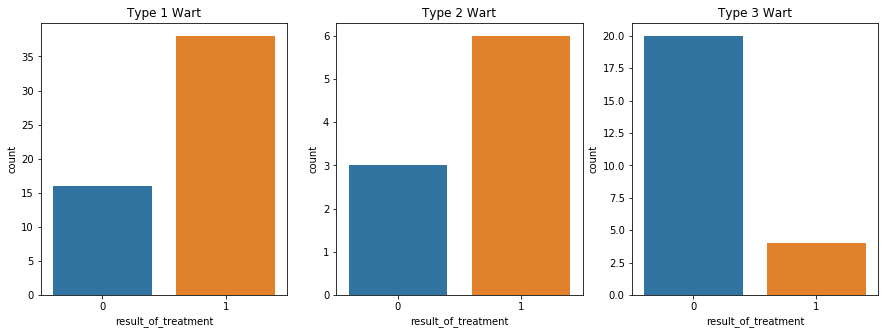

In [18]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(df[df['type']==1]['result_of_treatment'],ax=ax1)
sns.countplot(df[df['type']==2]['result_of_treatment'],ax=ax2)
sns.countplot(df[df['type']==3]['result_of_treatment'],ax=ax3)
ax1.title.set_text('Type 1 Wart')
ax2.title.set_text('Type 2 Wart')
ax3.title.set_text('Type 3 Wart')

# Supervised Learning

## Classifications

In [9]:
y=df['result_of_treatment']
x=df.drop('result_of_treatment',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 42)

## Logistic Regression

In [11]:
logreg = LogisticRegression(random_state=0)
logreg.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
ypred=logreg.predict(xtest)

In [13]:
cm = confusion_matrix(y_target=ytest, y_predicted=ypred, binary=False)
cm

array([[11,  3],
       [ 4,  9]])

In [16]:
print('Score for Train Set: ',logreg.score(xtrain, ytrain))
print('Score for Test Set: ',logreg.score(xtest, ytest))

Score for Train Set:  0.8888888888888888
Score for Test Set:  0.7407407407407407


In [17]:
accuracy_score(ytest,ypred)

0.7407407407407407

In [18]:
recall_score(ytest,ypred)

0.6923076923076923

In [19]:
precision_score(ytest,ypred)

0.75

## Decision Tree

### Entropy

In [20]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [21]:
ypred=decisiontree.predict(xtest)

In [86]:
from sklearn.model_selection import cross_val_score

decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
scores=cross_val_score(decisiontree,x,y,cv=10,scoring='accuracy')
    
print(scores.mean())

0.8758333333333332


### Gini

In [31]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='gini', random_state=40)
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [32]:
ypred=decisiontree.predict(xtest)

In [33]:
accuracy_score(ytest,ypred)

0.7407407407407407

In [85]:
from sklearn.model_selection import cross_val_score
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
scores=cross_val_score(decisiontree,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.8758333333333332


## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
ranforest= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
ranforest.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [88]:
ypred=ranforest.predict(xtest)

In [89]:
accuracy_score(ytest,ypred)

0.8148148148148148

In [90]:
from sklearn.model_selection import cross_val_score
random = RandomForestClassifier(criterion='entropy')
scores=cross_val_score(random,x,y,cv=10,scoring='accuracy')
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.9180555555555555


## KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
ypred = classifier.predict(xtest)

In [109]:
accuracy_score(ytest,ypred)

0.6666666666666666

In [110]:
from sklearn.model_selection import cross_val_score
krange=range(1,31)
kscores=[]
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    kscores.append(scores.mean())
print(kscores)

[0.9330555555555555, 0.8225, 0.8661111111111112, 0.8213888888888888, 0.668611111111111, 0.7652777777777777, 0.765, 0.7330555555555555, 0.7205555555555555, 0.7330555555555555, 0.6758333333333333, 0.7194444444444444, 0.6858333333333333, 0.6661111111111111, 0.6983333333333334, 0.6969444444444444, 0.673611111111111, 0.5844444444444445, 0.5955555555555556, 0.5644444444444444, 0.5630555555555555, 0.5691666666666666, 0.5702777777777778, 0.5927777777777777, 0.6066666666666667, 0.5966666666666667, 0.5966666666666667, 0.5286111111111111, 0.5855555555555556, 0.5855555555555555]


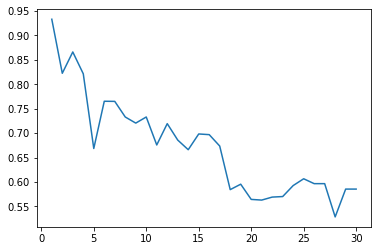

In [111]:
plt.plot(krange,kscores)

In [115]:
from sklearn.model_selection import GridSearchCV
krange=list(range(1,31))
weight_options=['uniform','distance']

In [116]:
param_grid=dict(n_neighbors=krange, weights=weight_options)
knn=KNeighborsClassifier()

In [117]:
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [118]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9444444444444444
{'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


In [119]:
from sklearn.neighbors import KNeighborsClassifier
knnup = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnup.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
ypred = knnup.predict(xtest)

In [121]:
accuracy_score(ytest,ypred)

0.6666666666666666

## Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [104]:
ypred=model.predict(xtest)

In [105]:
accuracy_score(ytest,ypred)

0.7777777777777778

In [106]:
recall_score(ytest,ypred, average='micro')

0.7777777777777778

## Bagging

In [150]:
kfold = model_selection.KFold(n_splits=10, random_state=21)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=40)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9111111111111112


In [151]:
model = BaggingClassifier()
model.fit(xtrain, ytrain)
print(); print(model)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [152]:
# make predictions
expected_y  = ytest
predicted_y = model.predict(xtest)

In [153]:
print(accuracy_score(expected_y, predicted_y))
print(classification_report(expected_y, predicted_y))

0.8518518518518519
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.69      0.82        13

    accuracy                           0.85        27
   macro avg       0.89      0.85      0.85        27
weighted avg       0.88      0.85      0.85        27



### Adaboost classifier

In [136]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [138]:
ypred = classifier.predict(xtest)

In [140]:
confusion_matrix(ytest, ypred)

array([[11,  3],
       [ 2, 11]])

In [141]:
accuracy_score(ytest,ypred)

0.8148148148148148

### Gradient Descent

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  0.05
Accuracy score (training): 0.968
Accuracy score (validation): 0.778
Learning rate:  0.075
Accuracy score (training): 0.984
Accuracy score (validation): 0.815
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.815
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.815
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.815
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.815
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.815


In [149]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(xtrain, ytrain)
predictions = gb_clf2.predict(xtest)

print("Confusion Matrix:")
print(confusion_matrix(ytest, predictions))

print("Accuracy:",accuracy_score(ytest, predictions))

print("Classification Report")
print(classification_report(ytest, predictions))

Confusion Matrix:
[[11  3]
 [ 2 11]]
Accuracy: 0.8148148148148148
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.79      0.85      0.81        13

    accuracy                           0.81        27
   macro avg       0.82      0.82      0.81        27
weighted avg       0.82      0.81      0.81        27



## Stacking

In [127]:
from xgboost import XGBClassifier
from vecstack import stacking

models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [129]:
S_train, S_test = stacking(models,
                           xtrain, ytrain, xtest,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.87500000]
    fold  1:  [0.81250000]
    fold  2:  [0.81250000]
    fold  3:  [0.66666667]
    ----
    MEAN:     [0.79166667] + [0.07654655]
    FULL:     [0.79365079]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.87500000]
    fold  2:  [0.87500000]
    fold  3:  [0.93333333]
    ----
    MEAN:     [0.92083333] + [0.05153882]
    FULL:     [0.92063492]

model  2:     [XGBClassifier]
    fold  0:  [0.93750000]
    fold  1:  [1.00000000]
    fold  2:  [0.87500000]
    fold  3:  [0.80000000]
    ----
    MEAN:     [0.90312500] + [0.07414882]
    FULL:     [0.90476190]



### Random Forest Classifier has the maximum accuracy among other models.

# Unsupervised

## K Means

In [389]:
from sklearn.cluster import KMeans

In [390]:
y=df.iloc[:,-1]
df=df.iloc[:,:-1]

In [391]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)

In [392]:
krange=range(1,21)
clerror=[]


for k in krange:
    cluster=KMeans(k)
    cluster.fit(df)
    clerror.append(cluster.inertia_)
clusters_df=pd.DataFrame({'k':krange,'Cluster Error':clerror})
clusters_df.head()

,k,Cluster Error
0,1,540.000000
1,2,414.386269
2,3,338.471508
3,4,277.229065
4,5,247.133019


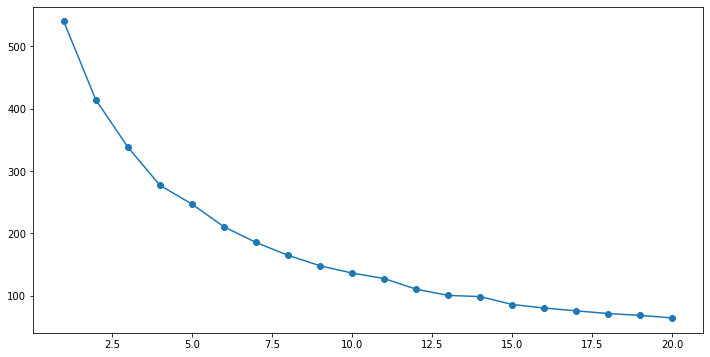

In [393]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df['k'],clusters_df['Cluster Error'],marker='o')

In [394]:
a=[]
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state=40).fit(df)
    ypredkm=kmeans.labels_
    a.append(accuracy_score(y,ypredkm))

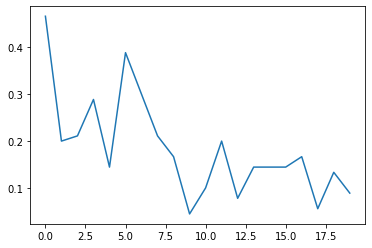

In [395]:
plt.plot(a)

In [396]:
kmeans = KMeans(n_clusters=3, random_state=40).fit(df)
ypredkm1=kmeans.labels_

In [397]:
accuracy_score(ypredkm1,y)

0.2111111111111111

## Hierarchial

In [398]:
from scipy.cluster.hierarchy import dendrogram, linkage

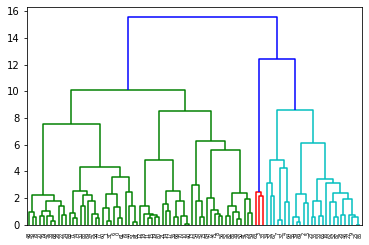

In [399]:
z=linkage(df,'ward') #single, complete, average, centroid, wards
dendrogram(z)
plt.show()

In [400]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
ypredhr=cluster.fit_predict(df)

In [401]:
accuracy_score(y,ypredhr)

0.7888888888888889

## Classification, Again...

In [402]:
confusion_matrix(y,ypredhr)

array([[26, 16],
       [ 3, 45]], dtype=int64)

In [403]:
ypredhr=pd.DataFrame({'Predict':ypredhr})
ypredhr.head()

,Predict
0,1
1,1
2,0
3,0
4,0


In [404]:
df=pd.DataFrame(df)

In [405]:
df=pd.concat([df,ypredhr],axis=1)

## Logistic Regression

In [406]:
y=df['Predict']
x=df.drop('Predict',axis=1)

In [407]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [408]:
logreg = LogisticRegression(random_state=0)
logreg.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [409]:
ypred=logreg.predict(xtest)

In [410]:
print('Score for Train Set: ',logreg.score(xtrain, ytrain))
print('Score for Test Set: ',logreg.score(xtest, ytest))

Score for Train Set:  0.9841269841269841
Score for Test Set:  0.9629629629629629


In [411]:
accuracy_score(ytest,ypred)

0.9629629629629629

In [412]:
recall_score(ytest,ypred)

0.9444444444444444

In [413]:
precision_score(ytest,ypred)

1.0

## Decision Tree

### Entropy

In [414]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [415]:
ypred=decisiontree.predict(xtest)

In [416]:
from sklearn.model_selection import cross_val_score

decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
scores=cross_val_score(decisiontree,x,y,cv=10,scoring='accuracy')
    
print(scores.mean())

0.9219444444444445


### Gini

In [417]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='gini', random_state=40)
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [418]:
ypred=decisiontree.predict(xtest)

In [419]:
accuracy_score(ytest,ypred)

0.8888888888888888

In [420]:
from sklearn.model_selection import cross_val_score
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
scores=cross_val_score(decisiontree,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.9219444444444445


## Random Forest

In [421]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
ranforest= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
ranforest.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [422]:
ypred=ranforest.predict(xtest)

In [423]:
accuracy_score(ytest,ypred)

0.9629629629629629

In [424]:
from sklearn.model_selection import cross_val_score
random = RandomForestClassifier(criterion='entropy')
scores=cross_val_score(random,x,y,cv=10,scoring='accuracy')
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.9541666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## KNN

In [425]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [426]:
ypred = classifier.predict(xtest)

In [427]:
accuracy_score(ytest,ypred)

1.0

In [428]:
from sklearn.model_selection import cross_val_score
krange=range(1,31)
kscores=[]
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    kscores.append(scores.mean())
print(kscores)

[0.9777777777777779, 0.9777777777777779, 0.9555555555555555, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9566666666666667, 0.9555555555555555, 0.9555555555555555, 0.9555555555555555, 0.9666666666666666, 0.9555555555555555, 0.9555555555555555, 0.9555555555555555, 0.9555555555555555, 0.9555555555555555, 0.9344444444444445, 0.9344444444444445, 0.9108333333333334, 0.9108333333333334, 0.9219444444444445, 0.9108333333333334]


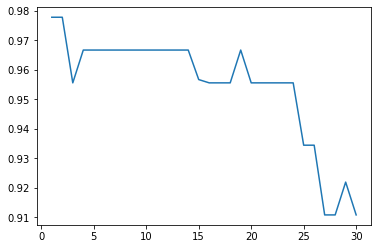

In [429]:
plt.plot(krange,kscores)

In [430]:
from sklearn.model_selection import GridSearchCV
krange=list(range(1,31))
weight_options=['uniform','distance']

In [431]:
param_grid=dict(n_neighbors=krange, weights=weight_options)
knn=KNeighborsClassifier()

In [432]:
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [433]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9777777777777777
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [434]:
from sklearn.neighbors import KNeighborsClassifier
knnup = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knnup.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [435]:
ypred = knnup.predict(xtest)

In [436]:
accuracy_score(ytest,ypred)

1.0

## Naive Bayes

In [437]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [438]:
ypred=model.predict(xtest)

In [439]:
accuracy_score(ytest,ypred)

0.9629629629629629

In [440]:
recall_score(ytest,ypred, average='micro')

0.9629629629629629

## Bagging

In [441]:
kfold = model_selection.KFold(n_splits=10, random_state=21)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=40)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9444444444444444


In [442]:
model = BaggingClassifier()
model.fit(xtrain, ytrain)
print(); print(model)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [443]:
# make predictions
expected_y  = ytest
predicted_y = model.predict(xtest)

In [444]:
print(accuracy_score(expected_y, predicted_y))
print(classification_report(expected_y, predicted_y))

0.9629629629629629
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.94      0.97        18

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



### Adaboost classifier

In [445]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [446]:
ypred = classifier.predict(xtest)

In [447]:
confusion_matrix(ytest, ypred)

array([[ 9,  0],
       [ 0, 18]], dtype=int64)

In [448]:
accuracy_score(ytest,ypred)

1.0

### Gradient Descent

In [449]:
from sklearn.ensemble import GradientBoostingClassifier

In [450]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  0.05
Accuracy score (training): 0.952
Accuracy score (validation): 0.926
Learning rate:  0.075
Accuracy score (training): 0.968
Accuracy score (validation): 0.889
Learning rate:  0.1
Accuracy score (training): 0.968
Accuracy score (validation): 0.926
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.963
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.963
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.963
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.963


In [451]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(xtrain, ytrain)
predictions = gb_clf2.predict(xtest)

print("Confusion Matrix:")
print(confusion_matrix(ytest, predictions))

print("Accuracy:",accuracy_score(ytest, predictions))

print("Classification Report")
print(classification_report(ytest, predictions))

Confusion Matrix:
[[ 7  2]
 [ 0 18]]
Accuracy: 0.9259259259259259
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.90      1.00      0.95        18

    accuracy                           0.93        27
   macro avg       0.95      0.89      0.91        27
weighted avg       0.93      0.93      0.92        27



## Stacking

In [452]:
from xgboost import XGBClassifier
from vecstack import stacking

models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [453]:
S_train, S_test = stacking(models,
                           xtrain, ytrain, xtest,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.93750000]
    fold  2:  [1.00000000]
    fold  3:  [0.93333333]
    ----
    MEAN:     [0.96770833] + [0.03232525]
    FULL:     [0.96825397]

model  1:     [RandomForestClassifier]
    fold  0:  [0.93750000]
    fold  1:  [0.93750000]
    fold  2:  [0.93750000]
    fold  3:  [0.80000000]
    ----
    MEAN:     [0.90312500] + [0.05953925]
    FULL:     [0.90476190]

model  2:     [XGBClassifier]
    fold  0:  [0.93750000]
    fold  1:  [1.00000000]
    fold  2:  [0.87500000]
    fold  3:  [0.80000000]
    ----
    MEAN:     [0.90312500] + [0.07414882]
    FULL:     [0.90476190]



# Now, PCA

In [29]:
pca = PCA()
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)

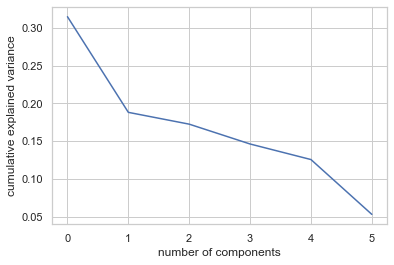

In [30]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [31]:
pca = PCA(n_components=2)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)

In [32]:
print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2']))

      sex  age          time  number_of_warts          type          area
PC-1  1.0  0.0 -0.000000e+00    -0.000000e+00 -0.000000e+00 -0.000000e+00
PC-2 -0.0  1.0 -2.089751e-15     6.218063e-16  9.271806e-16 -2.491581e-16


## Classifications

In [36]:
logreg = LogisticRegression(random_state=0)
logreg.fit(xtrain,ytrain)

C:\Users\krishnaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
ypred=logreg.predict(xtest)

In [38]:
print('Score for Train Set: ',logreg.score(xtrain, ytrain))
print('Score for Test Set: ',logreg.score(xtest, ytest))

Score for Train Set:  0.8571428571428571
Score for Test Set:  0.7777777777777778


In [39]:
accuracy_score(ytest,ypred)

0.7777777777777778

In [40]:
recall_score(ytest,ypred)

0.8461538461538461

In [41]:
precision_score(ytest,ypred)

0.7333333333333333

## Decision Tree

### Entropy

In [42]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [43]:
ypred=decisiontree.predict(xtest)

In [44]:
from sklearn.model_selection import cross_val_score

decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
scores=cross_val_score(decisiontree,x,y,cv=10,scoring='accuracy')
    
print(scores.mean())

0.8758333333333332


### Gini

In [45]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='gini', random_state=40)
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [46]:
ypred=decisiontree.predict(xtest)

In [47]:
accuracy_score(ytest,ypred)

0.6666666666666666

In [48]:
from sklearn.model_selection import cross_val_score
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=40)
scores=cross_val_score(decisiontree,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.8758333333333332


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
ranforest= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
ranforest.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [50]:
ypred=ranforest.predict(xtest)

In [51]:
accuracy_score(ytest,ypred)

0.6666666666666666

In [52]:
from sklearn.model_selection import cross_val_score
random = RandomForestClassifier(criterion='entropy')
scores=cross_val_score(random,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.9305555555555556


C:\Users\krishnaraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\krishnaraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\krishnaraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\krishnaraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\krishnaraj\Anaconda3\lib\site-packages\sklearn\

## KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
ypred = classifier.predict(xtest)

In [55]:
accuracy_score(ytest,ypred)

0.7037037037037037

In [56]:
from sklearn.model_selection import cross_val_score
krange=range(1,31)
kscores=[]
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    kscores.append(scores.mean())
print(kscores)

[0.9330555555555555, 0.8225, 0.8661111111111112, 0.8213888888888888, 0.668611111111111, 0.7652777777777777, 0.765, 0.7330555555555555, 0.7205555555555555, 0.7330555555555555, 0.6758333333333333, 0.7194444444444444, 0.6858333333333333, 0.6661111111111111, 0.6983333333333334, 0.6969444444444444, 0.673611111111111, 0.5844444444444445, 0.5955555555555556, 0.5644444444444444, 0.5630555555555555, 0.5691666666666666, 0.5702777777777778, 0.5927777777777777, 0.6066666666666667, 0.5966666666666667, 0.5966666666666667, 0.5286111111111111, 0.5855555555555556, 0.5855555555555555]


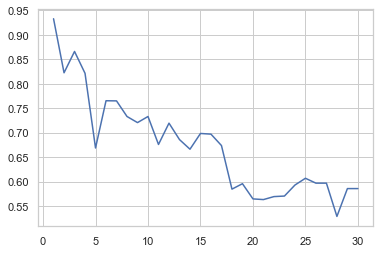

In [57]:
plt.plot(krange,kscores)

In [58]:
from sklearn.model_selection import GridSearchCV
krange=list(range(1,31))
weight_options=['uniform','distance']

In [59]:
param_grid=dict(n_neighbors=krange, weights=weight_options)
knn=KNeighborsClassifier()

In [60]:
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

C:\Users\krishnaraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9444444444444444
{'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knnup = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnup.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
ypred = knnup.predict(xtest)

In [64]:
accuracy_score(ytest,ypred)

0.7037037037037037

## Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
ypred=model.predict(xtest)

In [67]:
accuracy_score(ytest,ypred)

0.7037037037037037

In [68]:
recall_score(ytest,ypred, average='micro')

0.7037037037037037

## Bagging

In [69]:
kfold = model_selection.KFold(n_splits=10, random_state=21)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=40)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9111111111111112


In [70]:
model = BaggingClassifier()
model.fit(xtrain, ytrain)
print(); print(model)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [71]:
# make predictions
expected_y  = ytest
predicted_y = model.predict(xtest)

In [72]:
print(accuracy_score(expected_y, predicted_y))
print(classification_report(expected_y, predicted_y))

0.6666666666666666
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.64      0.69      0.67        13

    accuracy                           0.67        27
   macro avg       0.67      0.67      0.67        27
weighted avg       0.67      0.67      0.67        27



### Adaboost classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [74]:
ypred = classifier.predict(xtest)

In [75]:
confusion_matrix(ytest, ypred)

array([[10,  4],
       [ 5,  8]])

In [76]:
accuracy_score(ytest,ypred)

0.6666666666666666

### Gradient Descent

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  0.05
Accuracy score (training): 0.873
Accuracy score (validation): 0.667
Learning rate:  0.075
Accuracy score (training): 0.873
Accuracy score (validation): 0.667
Learning rate:  0.1
Accuracy score (training): 0.889
Accuracy score (validation): 0.667
Learning rate:  0.25
Accuracy score (training): 0.968
Accuracy score (validation): 0.667
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.667
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.630
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.667


In [83]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.075, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(xtrain, ytrain)
predictions = gb_clf2.predict(xtest)

print("Confusion Matrix:")
print(confusion_matrix(ytest, predictions))

print("Accuracy:",accuracy_score(ytest, predictions))

print("Classification Report")
print(classification_report(ytest, predictions))

Confusion Matrix:
[[ 7  7]
 [ 2 11]]
Accuracy: 0.6666666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.61      0.85      0.71        13

    accuracy                           0.67        27
   macro avg       0.69      0.67      0.66        27
weighted avg       0.70      0.67      0.66        27



## Stacking

In [84]:
from xgboost import XGBClassifier
from vecstack import stacking

models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [85]:
S_train, S_test = stacking(models,
                           xtrain, ytrain, xtest,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.81250000]
    fold  1:  [0.81250000]
    fold  2:  [0.87500000]
    fold  3:  [0.80000000]
    ----
    MEAN:     [0.82500000] + [0.02931510]
    FULL:     [0.82539683]

model  1:     [RandomForestClassifier]
    fold  0:  [0.87500000]
    fold  1:  [0.81250000]
    fold  2:  [0.87500000]
    fold  3:  [0.80000000]
    ----
    MEAN:     [0.84062500] + [0.03465793]
    FULL:     [0.84126984]

model  2:     [XGBClassifier]
    fold  0:  [0.81250000]
    fold  1:  [0.81250000]
    fold  2:  [0.87500000]
    fold  3:  [0.73333333]
    ----
    MEAN:     [0.80833333] + [0.05025974]
    FULL:     [0.80952381]

